In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

Load and View Data

In [3]:
# df = pd.read_csv('./monitoring_data_logging.csv')
# df = pd.read_csv('./NPIC_Pond_Data_for_AI.csv')
df = pd.read_csv('./realtime_data_logging.csv')
df.head()

,Time,Temperature,pH,Turbidity,DissolvedOxygen
0,13:35.7,0.00,0.00,0.0,0.00
1,13:36.0,0.00,0.00,0.0,0.00
2,13:36.3,0.00,0.00,0.0,0.00
3,13:36.6,25.95,9.27,246.2,2.26
4,13:36.8,25.95,9.27,246.2,2.26


Split Train as Input (X) and Output (y)

In [4]:
X = df[['Temperature', 'pH', 'Turbidity']]
y = df['DissolvedOxygen']


Clean NaN Data

In [5]:
X.fillna(method='ffill', inplace=True)
y.fillna(method='ffill', inplace=True)

C:\Users\nyvir\AppData\Local\Temp\ipykernel_2724\3198342668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)


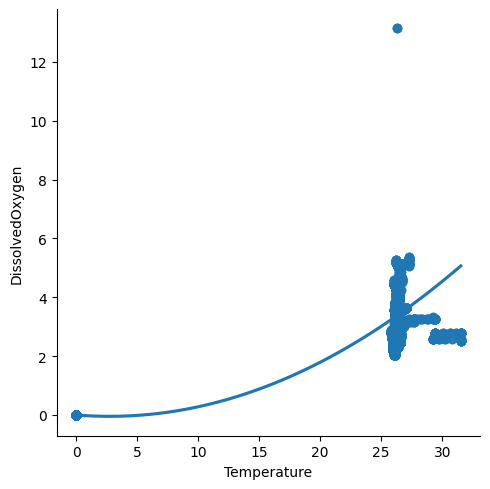

In [6]:
sns.lmplot(x='Temperature', y='DissolvedOxygen', data=df, order=2, ci=None)

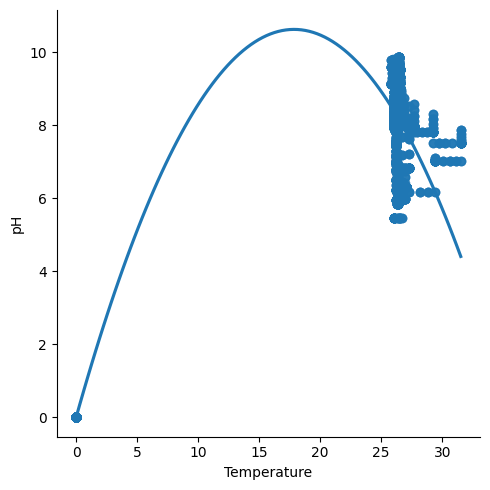

In [7]:
sns.lmplot(x='Temperature', y='pH', data=df, order=2, ci=None)

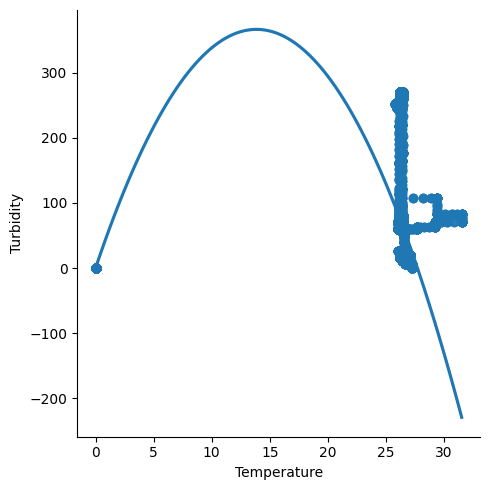

In [8]:
sns.lmplot(x='Temperature', y='Turbidity', data=df, order=2, ci=None)

In [9]:
X.head()

,Temperature,pH,Turbidity
0,0.00,0.00,0.0
1,0.00,0.00,0.0
2,0.00,0.00,0.0
3,25.95,9.27,246.2
4,25.95,9.27,246.2


In [10]:
y.head()

0    0.00
1    0.00
2    0.00
3    2.26
4    2.26
Name: DissolvedOxygen, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
linear_regression = LinearRegression()

Training

In [13]:
linear_regression.fit(X_train, y_train)

LinearRegression()

Save Trained Model to File

In [14]:
filename = 'water_quality_model.pkl'
pickle.dump(linear_regression, open(filename, 'wb'))

In [15]:
print(linear_regression.score(X_test, y_test))

0.7901974656657964


Make Predictions

In [16]:
y_predict = linear_regression.predict(X_test)

X_test


,Temperature,pH,Turbidity
35627,0.00,0.00,0.00
7483,26.29,8.00,69.72
17126,26.20,9.12,270.11
22338,26.29,8.10,17.32
105,25.96,9.14,247.04
...,...,...,...
35698,0.00,0.00,0.00
959,25.99,9.14,246.67
9515,26.32,7.96,69.68
35954,0.00,0.00,0.00


In [17]:
y_predict.reshape(-1,1)

array([[0.00396496],
       [3.34667331],
       [1.88589188],
       ...,
       [3.3438862 ],
       [0.00396496],
       [3.20545764]])

Analyze The Prediction

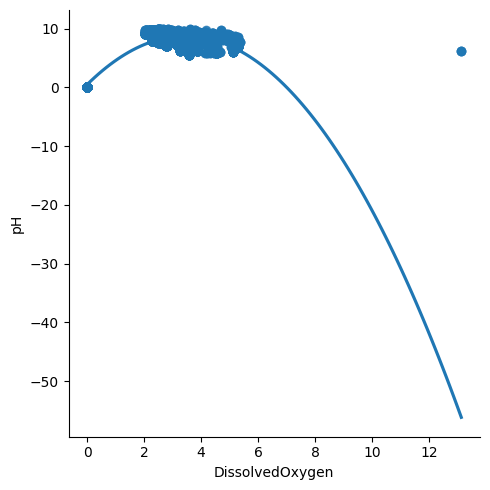

In [19]:
sns.lmplot(x='DissolvedOxygen', y='pH', data=df, order=2, ci=None)